In [22]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the time series data
# Assuming the time series data is loaded into a DataFrame called 'df'
# and the target variable is in a column called 'target'

df = pd.read_csv('../data/processed/CO2_Emissions.csv',index_col='year',parse_dates=True)
df.index.freq = 'AS'

In [23]:
df1 = df['China']
df1 = df1.to_frame()
df1.head()

,China
Year,
1960-01-01,798.80
1961-01-01,570.63
1962-01-01,459.62
1963-01-01,456.78
1964-01-01,460.64


In [24]:

data = df1['China'].values.reshape(-1, 1)  # Reshape to a 2D array
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale data to [0, 1]
data = scaler.fit_transform(data)


In [25]:

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Function to create input sequences and target values
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [41]:
# Define hyperparameters
seq_length = 10  # Length of input sequences
batch_size = 32
epochs = 500

# Create input sequences and target values for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [42]:

# Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # Compile the model


In [43]:

# Train the LSTM model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/500
2/2 [==============================] - 1s 394ms/step - loss: 0.0811
Epoch 2/500
2/2 [==============================] - 0s 104ms/step - loss: 0.0737
Epoch 3/500
2/2 [==============================] - 0s 100ms/step - loss: 0.0662
Epoch 4/500
2/2 [==============================] - 0s 96ms/step - loss: 0.0596
Epoch 5/500
2/2 [==============================] - 0s 92ms/step - loss: 0.0530
Epoch 6/500
2/2 [==============================] - 0s 105ms/step - loss: 0.0475
Epoch 7/500
2/2 [==============================] - 0s 101ms/step - loss: 0.0421
Epoch 8/500
2/2 [==============================] - 0s 98ms/step - loss: 0.0374
Epoch 9/500
2/2 [==============================] - 0s 101ms/step - loss: 0.0329
Epoch 10/500
2/2 [==============================] - 0s 118ms/step - loss: 0.0286
Epoch 11/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0240
Epoch 12/500
2/2 [==============================] - 0s 98ms/step - loss: 0.0209
Epoch 13/500
2/2 [=======================

In [44]:

# Evaluate the LSTM model
train_loss = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
test_loss = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


Train Loss: 0.00022491117124445736
Test Loss: 10.324397087097168


In [45]:

# Make predictions with the LSTM model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


1/1 [==============================] - 0s 47ms/step


In [46]:

# Inverse transform the predictions and target values to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [47]:

# Evaluate the performance of the LSTM model with additional metrics
# ... (e.g., MSE, RMSE, MAPE, etc.)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [48]:
# Calculate metrics for training set
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

# Print the calculated metrics
print("Train MSE : ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train MAE : ", train_mae)
print("Train MAPE: ", train_mape)
print("Test MSE  : ", test_mse)
print("Test RMSE : ", test_rmse)
print("Test MAE  : ", test_mae)
print("Test MAPE : ", test_mape)

Train MSE :  23450.7645766442
Train RMSE:  153.13642472202426
Train MAE :  124.35814157586348
Train MAPE:  5.598762471886374
Test MSE  :  1076491391.7196536
Test RMSE :  32809.9282492305
Test MAE  :  32525.581093750003
Test MAPE :  309.74293782945847


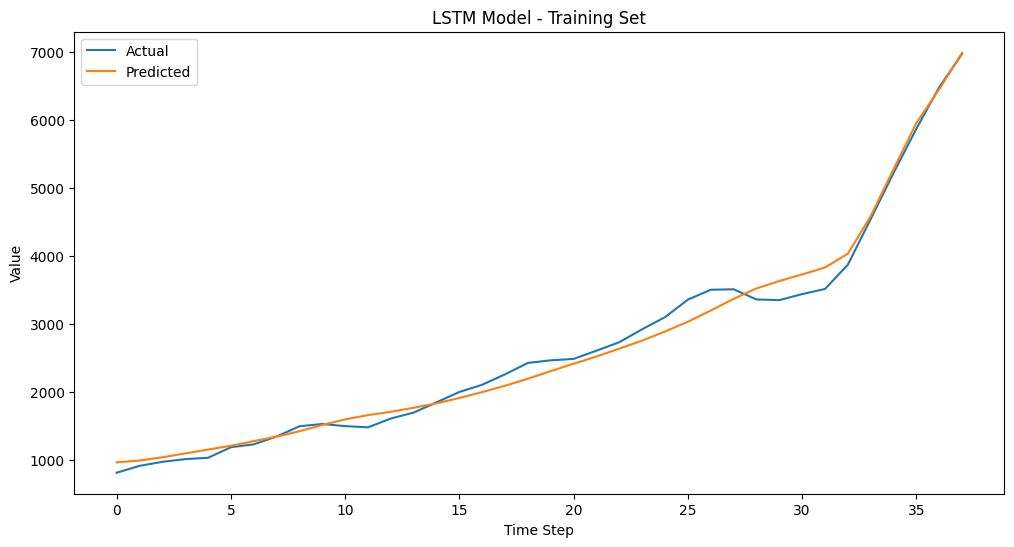

In [49]:

# Plot the predictions and actual values
# ... (e.g., using matplotlib, seaborn, etc.)
import matplotlib.pyplot as plt

# Plot the predictions and actual values for training set
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('LSTM Model - Training Set')
plt.legend()
plt.show()


In [35]:
y_train, y_test

(array([[ 807.95],
        [ 909.21],
        [ 968.65],
        [1008.29],
        [1028.1 ],
        [1183.22],
        [1226.42],
        [1340.83],
        [1492.78],
        [1525.66],
        [1494.5 ],
        [1476.49],
        [1606.59],
        [1694.22],
        [1844.83],
        [1998.08],
        [2104.21],
        [2257.74],
        [2425.89],
        [2463.65],
        [2484.85],
        [2606.1 ],
        [2730.79],
        [2921.65],
        [3100.  ],
        [3357.91],
        [3503.23],
        [3510.17],
        [3360.46],
        [3350.34],
        [3439.15],
        [3514.93],
        [3872.6 ],
        [4545.01],
        [5223.75],
        [5876.56],
        [6488.8 ],
        [6978.61]]),
 array([[10289.99],
        [10489.99],
        [10667.89]]))

In [36]:
train_predictions,test_predictions

(array([[ 969.5769 ],
        [ 995.80554],
        [1044.0093 ],
        [1101.3269 ],
        [1159.236  ],
        [1214.4058 ],
        [1284.033  ],
        [1350.8905 ],
        [1431.715  ],
        [1524.8527 ],
        [1608.9994 ],
        [1671.6654 ],
        [1721.0488 ],
        [1781.3729 ],
        [1846.5107 ],
        [1926.7118 ],
        [2014.5586 ],
        [2108.6816 ],
        [2212.2388 ],
        [2324.8823 ],
        [2432.8691 ],
        [2537.6003 ],
        [2653.5535 ],
        [2771.8196 ],
        [2905.4648 ],
        [3048.0784 ],
        [3212.509  ],
        [3382.6074 ],
        [3533.0857 ],
        [3638.2075 ],
        [3731.6921 ],
        [3830.306  ],
        [3987.842  ],
        [4535.297  ],
        [5213.3823 ],
        [5890.7046 ],
        [6457.1216 ],
        [7079.8374 ]], dtype=float32),
 array([[ 81656.84 ],
        [ 99611.664],
        [119145.8  ]], dtype=float32))

In [37]:
model.save('lstm_model.h5')